- Summary
- Business Understanding\
   Apple looking to understand positive and negative sentiment around their products and how to improve. Focusing on neutral 
   and negative sentiment tweets as demographics to focus on.
- Data Understanding


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# !ls

In [5]:
df = pd.read_csv("data/tweet_product_company.csv", encoding = 'latin-1')

In [6]:
df['tweet_text_lower'] = df['tweet_text'].str.lower()

Checking if any Apple terms are in tweet_text to work with all apple related tweets since there are many missing values in
'emotion_in_tweet_is_directed_at'

In [7]:
apple_related = 'ipad|apple|iphone|itunes'

In [8]:
df['tweet_text_lower'].str.contains(apple_related).sum()

5592

In [9]:
df.shape

(9093, 4)

Dropping the one row with missing tweet_text

In [10]:
df.dropna(subset=['tweet_text'], inplace=True)

In [11]:
apple_df = df[df['tweet_text_lower'].str.contains(apple_related)].copy()

In [12]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5592 entries, 0 to 9091
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          5592 non-null   object
 1   emotion_in_tweet_is_directed_at                     2417 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  5592 non-null   object
 3   tweet_text_lower                                    5592 non-null   object
dtypes: object(4)
memory usage: 218.4+ KB


Dropping Columns 'emotion_in_tweet_is_direct_at' because we have focused on all Apple related tweets already and will analyze sentiment from there.

In [13]:
# apple_df.drop(columns=['emotion_in_tweet_is_directed_at', 'tweet_text_lower'], axis=1, inplace=True)

In [14]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5592 entries, 0 to 9091
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          5592 non-null   object
 1   emotion_in_tweet_is_directed_at                     2417 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  5592 non-null   object
 3   tweet_text_lower                                    5592 non-null   object
dtypes: object(4)
memory usage: 218.4+ KB


In [15]:
apple_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    2929
Positive emotion                      2144
Negative emotion                       420
I can't tell                            99
Name: count, dtype: int64

In [16]:
def custom_encoder(apple_df):
    apple_df.replace(to_replace ="No emotion toward brand or product", value =2, inplace=True)
    apple_df.replace(to_replace ="Positive emotion", value =1, inplace=True)
    apple_df.replace(to_replace ="Negative emotion", value =0, inplace=True)
    apple_df.replace(to_replace ="I can't tell", value =2, inplace=True)

In [17]:
custom_encoder(apple_df['is_there_an_emotion_directed_at_a_brand_or_product'])

In [18]:
apple_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_text_lower
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,.@wesley83 i have a 3g iphone. after 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,@jessedee know about @fludapp ? awesome ipad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,@swonderlin can not wait for #ipad 2 also. the...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,@sxsw i hope this year's festival isn't as cra...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,2,@teachntech00 new ipad apps for #speechtherapy...


In [19]:
apple_df.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "emotion"}, inplace=True)

In [20]:
apple_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion,tweet_text_lower
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,.@wesley83 i have a 3g iphone. after 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,@jessedee know about @fludapp ? awesome ipad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,@swonderlin can not wait for #ipad 2 also. the...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,@sxsw i hope this year's festival isn't as cra...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,2,@teachntech00 new ipad apps for #speechtherapy...


In [21]:
apple_df.duplicated().sum()

5

In [22]:
apple_df.drop_duplicates(inplace=True)

In [23]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5587 entries, 0 to 9091
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tweet_text                       5587 non-null   object
 1   emotion_in_tweet_is_directed_at  2412 non-null   object
 2   emotion                          5587 non-null   int64 
 3   tweet_text_lower                 5587 non-null   object
dtypes: int64(1), object(3)
memory usage: 218.2+ KB


# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X = apple_df.drop(columns=['emotion'], axis=1)
y = apple_df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
train_sample = X_train.sample(5, random_state=42)
train_sample.style.set_properties(**{'text-align': 'left'})

,tweet_text,emotion_in_tweet_is_directed_at,tweet_text_lower
7403,#SXSW -Apple Pop-Up Store being set up right now on 6th St. My fellow truck driver is delivering the furniture NOW.,nan,#sxsw -apple pop-up store being set up right now on 6th st. my fellow truck driver is delivering the furniture now.
5609,RT @mention Check out the #dokobots game from @mention for iPhone and Android. Seems pretty cool. #geogames #SXSW #tmsxsw,iPad or iPhone App,rt @mention check out the #dokobots game from @mention for iphone and android. seems pretty cool. #geogames #sxsw #tmsxsw
8988,It's crazy here at #Apple's temporary #Austin store. Post coming up with pics. #SXSW,nan,it's crazy here at #apple's temporary #austin store. post coming up with pics. #sxsw
2394,At #SXSW conf and EVERYONE has a Mac or Ipad (including me). What happened to the PC? Is it becoming obsolete?,iPad,at #sxsw conf and everyone has a mac or ipad (including me). what happened to the pc? is it becoming obsolete?
2461,"free #iPad Lounge open daily for #SXSW serving art made on iPads, and local art, free coffee, @mention Austin Details {link} #photo",nan,"free #ipad lounge open daily for #sxsw serving art made on ipads, and local art, free coffee, @mention austin details {link} #photo"


# Wes

In [26]:
df.isnull().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
tweet_text_lower                                         0
dtype: int64

- Removing one row where tweet_text is not available

In [27]:
df.dropna(subset=['tweet_text'], inplace=True)

In [28]:
df.isnull().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
tweet_text_lower                                         0
dtype: int64

In [29]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [30]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts() 

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [31]:
sample_tweets = df.sample(5, random_state=42)
sample_tweets.style.set_properties(**{'text-align': 'left'})

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_text_lower
7169,Google Close to Launching New Social Network - Circles {link} #google #sxsw,nan,No emotion toward brand or product,google close to launching new social network - circles {link} #google #sxsw
2089,iPhone charging at #SXSW {link},nan,No emotion toward brand or product,iphone charging at #sxsw {link}
2303,"The walk by Lady Bird Lake was lovely, but Google Maps travel times are not to be trusted. #SXSW",Other Google product or service,Negative emotion,"the walk by lady bird lake was lovely, but google maps travel times are not to be trusted. #sxsw"
928,"ÛÏ@mention Not a rumor: Apple doing popup store in downtown Austin for #SXSW & iPad 2 launch {link} Smart move, 1of many #dfcbto",Apple,Positive emotion,"ûï@mention not a rumor: apple doing popup store in downtown austin for #sxsw & ipad 2 launch {link} smart move, 1of many #dfcbto"
5895,"RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw via @mention @mention",nan,No emotion toward brand or product,"rt @mention google to launch major new social network called circles, possibly today {link} #sxsw via @mention @mention"


- Labeling target column (is_there_an_emotion_directed_at_a_brand_or_product) 0-2:

   -0 = Negative emotion
   -1 = Positive emotion
   -2 = No emotion AND Can't tell
   

In [32]:
def custom_encoder(df):
    df.replace(to_replace ="No emotion toward brand or product", value =2, inplace=True)
    df.replace(to_replace ="Positive emotion", value =1, inplace=True)
    df.replace(to_replace ="Negative emotion", value =0, inplace=True)
    df.replace(to_replace ="I can't tell", value =2, inplace=True)

In [33]:
custom_encoder(df['is_there_an_emotion_directed_at_a_brand_or_product'])

In [34]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_text_lower
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,.@wesley83 i have a 3g iphone. after 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,@jessedee know about @fludapp ? awesome ipad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,@swonderlin can not wait for #ipad 2 also. the...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,@sxsw i hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,@sxtxstate great stuff on fri #sxsw: marissa m...


 - Dropping emotion_in_tweet_is_directed_at for now just to analyze tweets and overall sentiment irregardless of brand.

In [35]:
df.drop(columns=['emotion_in_tweet_is_directed_at'], inplace=True)

In [36]:
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,tweet_text_lower
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0,.@wesley83 i have a 3g iphone. after 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,1,@jessedee know about @fludapp ? awesome ipad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,1,@swonderlin can not wait for #ipad 2 also. the...
3,@sxsw I hope this year's festival isn't as cra...,0,@sxsw i hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1,@sxtxstate great stuff on fri #sxsw: marissa m...


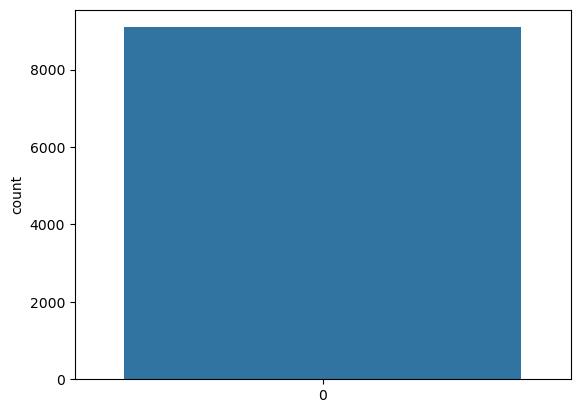

In [37]:
sns.countplot(df.is_there_an_emotion_directed_at_a_brand_or_product);

# Train test split

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_there_an_emotion_directed_at_a_brand_or_product'])
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
train_sample = X_train.sample(5, random_state=42)
train_sample.style.set_properties(**{'text-align': 'left'})

,tweet_text,tweet_text_lower
899,"Brilliant move by Apple: before it even begins, Apple wins #SXSW {link}","brilliant move by apple: before it even begins, apple wins #sxsw {link}"
7432,{link} Report: Apple to Open Pop-Up Store at #SXSW,{link} report: apple to open pop-up store at #sxsw
8515,omg ÛÏ@mention It's not a rumor: Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad 2 launch {link},omg ûï@mention it's not a rumor: apple is opening up a temporary store in downtown austin for #sxsw and the ipad 2 launch {link}
2951,"#sxsw: @mention intrvw @mention ""Govt is not a vending machine [put in $, get svcs], it's a platform; iPhone was a teaching moment""","#sxsw: @mention intrvw @mention ""govt is not a vending machine [put in $, get svcs], it's a platform; iphone was a teaching moment"""
8963,"Group #Texting War Heats Up: Fast Society Launches New Android App, Updates iPhone App: #SXSWÛ_ {link}","group #texting war heats up: fast society launches new android app, updates iphone app: #sxswû_ {link}"


# Preprocessing

# Namsoo

## Practice : tokenization, lemmatization, word frequency

In [40]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [41]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5587 entries, 0 to 9091
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tweet_text                       5587 non-null   object
 1   emotion_in_tweet_is_directed_at  2412 non-null   object
 2   emotion                          5587 non-null   int64 
 3   tweet_text_lower                 5587 non-null   object
dtypes: int64(1), object(3)
memory usage: 218.2+ KB


In [42]:
apple_df['tokens'] = df['tweet_text'].apply(word_tokenize)

In [43]:
apple_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion,tweet_text_lower,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,"[., @, wesley83, I, have, a, 3G, iPhone, ., Af..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,@jessedee know about @fludapp ? awesome ipad/i...,"[@, jessedee, Know, about, @, fludapp, ?, Awes..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,@swonderlin can not wait for #ipad 2 also. the...,"[@, swonderlin, Can, not, wait, for, #, iPad, ..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,@sxsw i hope this year's festival isn't as cra...,"[@, sxsw, I, hope, this, year, 's, festival, i..."
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,2,@teachntech00 new ipad apps for #speechtherapy...,"[@, teachntech00, New, iPad, Apps, For, #, Spe..."


In [44]:
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: [word.lower() for word in x])

In [45]:
apple_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion,tweet_text_lower,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,"[., @, wesley83, i, have, a, 3g, iphone, ., af..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,@jessedee know about @fludapp ? awesome ipad/i...,"[@, jessedee, know, about, @, fludapp, ?, awes..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,@swonderlin can not wait for #ipad 2 also. the...,"[@, swonderlin, can, not, wait, for, #, ipad, ..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,@sxsw i hope this year's festival isn't as cra...,"[@, sxsw, i, hope, this, year, 's, festival, i..."
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,2,@teachntech00 new ipad apps for #speechtherapy...,"[@, teachntech00, new, ipad, apps, for, #, spe..."


In [47]:
import string
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: 
                                              [word.translate(str.maketrans('', '', string.punctuation)) 
                                               for word in x])

In [48]:
apple_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion,tweet_text_lower,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,"[, , wesley83, i, have, a, 3g, iphone, , after..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,@jessedee know about @fludapp ? awesome ipad/i...,"[, jessedee, know, about, , fludapp, , awesome..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,@swonderlin can not wait for #ipad 2 also. the...,"[, swonderlin, can, not, wait, for, , ipad, 2,..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,@sxsw i hope this year's festival isn't as cra...,"[, sxsw, i, hope, this, year, s, festival, is,..."
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,2,@teachntech00 new ipad apps for #speechtherapy...,"[, teachntech00, new, ipad, apps, for, , speec..."


In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['sxsw','iphone','ipad','apple','','mention','link','rt','austin'])
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [word for word in x if word.lower() not in stop_words])

In [49]:
stop_words = set(stopwords.words('english'))

In [50]:
type(stop_words)

set

In [51]:

stop_words.update(['sxsw','iphone','ipad','apple','','mention','link','rt','austin'])

In [52]:
# stop_words.add('link')

In [53]:
# stop_words = stop_words.append('sxsw','iphone','ipad','apple')

In [54]:
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [word for word in x if word.lower() not in stop_words])

In [55]:
apple_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,emotion,tweet_text_lower,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,"[wesley83, 3g, 3, hrs, tweeting, riseaustin, d..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,@jessedee know about @fludapp ? awesome ipad/i...,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,@swonderlin can not wait for #ipad 2 also. the...,"[swonderlin, wait, 2, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,@sxsw i hope this year's festival isn't as cra...,"[hope, year, festival, nt, crashy, year, app]"
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,2,@teachntech00 new ipad apps for #speechtherapy...,"[teachntech00, new, apps, speechtherapy, commu..."


In [56]:
# nltk.download('wordnet')

In [57]:
lemmatizer = WordNetLemmatizer()

In [58]:
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])

In [59]:
apple_df['tokens'].head()

0    [wesley83, 3g, 3, hr, tweeting, riseaustin, de...
1    [jessedee, know, fludapp, awesome, ipadiphone,...
2                    [swonderlin, wait, 2, also, sale]
3        [hope, year, festival, nt, crashy, year, app]
5    [teachntech00, new, apps, speechtherapy, commu...
Name: tokens, dtype: object

In [60]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5587 entries, 0 to 9091
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tweet_text                       5587 non-null   object
 1   emotion_in_tweet_is_directed_at  2412 non-null   object
 2   emotion                          5587 non-null   int64 
 3   tweet_text_lower                 5587 non-null   object
 4   tokens                           5587 non-null   object
dtypes: int64(1), object(4)
memory usage: 261.9+ KB


### Sentiment TextBlob vs VADER

In [62]:
# pip install textblob
from textblob import TextBlob
apple_df['sentiment'] = apple_df['tweet_text'].apply(lambda x : TextBlob(x).sentiment.polarity)

In [105]:
apple_df['sentiment'].head()

0   -0.250000
1    0.466667
2   -0.155556
3    0.000000
5    0.136364
Name: sentiment, dtype: float64

### To control words in dataframes

In [152]:
# Load csv file to a DataFrame
df = pd.read_csv("data/tweet_product_company.csv", encoding = 'latin-1')
# To filter in tweets mentioning apple related products
df['tweet_text_lower'] = df['tweet_text'].str.lower()
apple_related = 'ipad|apple|iphone|itunes' # filter condition
df.dropna(subset=['tweet_text'], inplace=True) # droping out na
apple_df = df[df['tweet_text_lower'].str.contains(apple_related)].copy() # filtered
apple_df.drop_duplicates(inplace=True) # remove duplicated

# Sentiment analysis by TextBlob
# pip install textblob
from textblob import TextBlob
apple_df['sentiment'] = apple_df['tweet_text'].apply(lambda x : TextBlob(x).sentiment.polarity)

# Rename a column
apple_df.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "emotion"}, inplace=True)

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# tokenize
apple_df['tokens'] = df['tweet_text'].apply(word_tokenize)
# lowring case
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: [word.lower() for word in x])
# remove punctuation
import string
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: 
                                              [word.translate(str.maketrans('', '', string.punctuation)) 
                                               for word in x])




### stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['sxsw','iphone','ipad','apple','','mention','link','rt','austin','store','2','quot','popup'])
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [word for word in x if word.lower() not in stop_words])

# lemmy
lemmatizer = WordNetLemmatizer()
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])


In [153]:
df_pos = apple_df[apple_df['sentiment'] > 0]
df_neg = apple_df[apple_df['sentiment'] < 0]
df_neut = apple_df[apple_df['sentiment'] == 0]

### FreqDist plots

In [154]:
df_pos = apple_df[apple_df['sentiment'] > 0]
df_neg = apple_df[apple_df['sentiment'] < 0]
df_neut = apple_df[apple_df['sentiment'] == 0]

In [155]:
word_pos = nltk.FreqDist([word for tokens in df_pos['tokens'] for word in tokens])
word_neg = nltk.FreqDist([word for tokens in df_neg['tokens'] for word in tokens])
word_neut = nltk.FreqDist([word for tokens in df_neut['tokens'] for word in tokens])

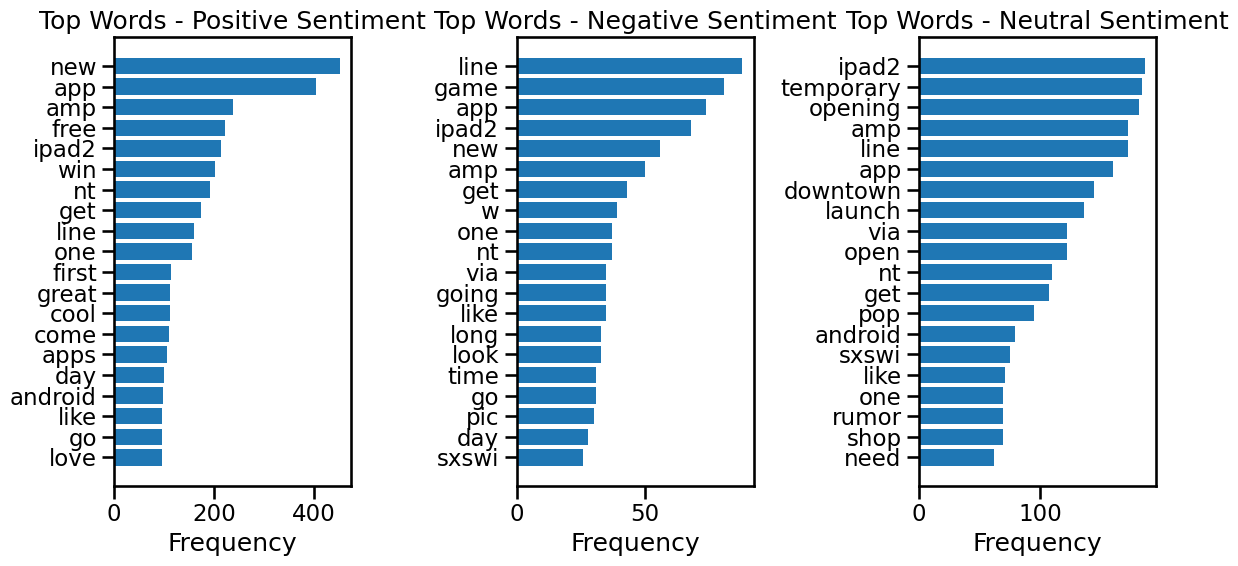

In [157]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the word frequencies using nltk.FreqDist
# word_pos, word_neg, word_neut are the FreqDist objects

# Get the top N words from each FreqDist object
top_n = 20  # Number of top words to display
top_words_pos = word_pos.most_common(top_n)
top_words_neg = word_neg.most_common(top_n)
top_words_neut = word_neut.most_common(top_n)

# Extract the words and frequencies from the top word lists, and reverse the order
words_pos, freqs_pos = zip(*reversed(top_words_pos))
words_neg, freqs_neg = zip(*reversed(top_words_neg))
words_neut, freqs_neut = zip(*reversed(top_words_neut))

# Plotting the word frequencies side by side
plt.figure(figsize=(12, 6))

# Plot for positive sentiment
plt.subplot(1, 3, 1)
plt.barh(range(len(words_pos)), freqs_pos, align='center')
plt.yticks(range(len(words_pos)), words_pos)
plt.xlabel('Frequency')
plt.title('Top Words - Positive Sentiment')

# Plot for negative sentiment
plt.subplot(1, 3, 2)
plt.barh(range(len(words_neg)), freqs_neg, align='center')
plt.yticks(range(len(words_neg)), words_neg)
plt.xlabel('Frequency')
plt.title('Top Words - Negative Sentiment')

# Plot for neutral sentiment
plt.subplot(1, 3, 3)
plt.barh(range(len(words_neut)), freqs_neut, align='center')
plt.yticks(range(len(words_neut)), words_neut)
plt.xlabel('Frequency')
plt.title('Top Words - Neutral Sentiment')

plt.tight_layout()
plt.show()

### Topic Modeling with Latent Dirichlet Allocation

#### comparing number of rows of pos, neg, neut

In [76]:
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 0 to 9091
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tweet_text                       793 non-null    object 
 1   emotion_in_tweet_is_directed_at  338 non-null    object 
 2   emotion                          793 non-null    int64  
 3   tweet_text_lower                 793 non-null    object 
 4   tokens                           793 non-null    object 
 5   sentiment                        793 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 43.4+ KB


In [84]:
len(df_neg)

793

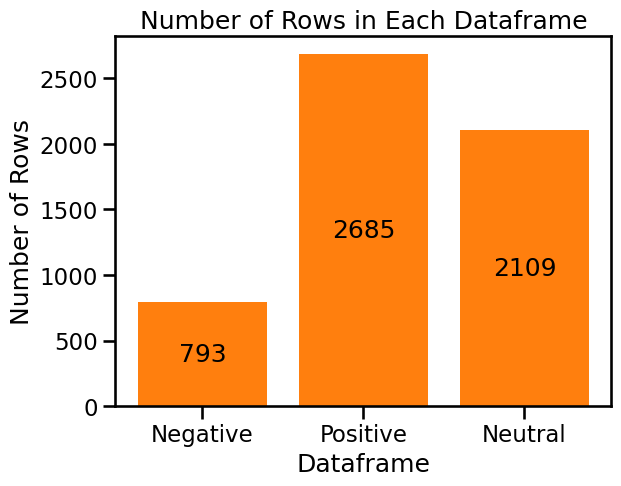

In [93]:
# Compare number of rows of each dataframes
sns.set_context('talk')
num_rows_neg = len(df_neg)
num_rows_pos = len(df_pos)
num_rows_neut = len(df_neut)

dataframe_names = ['Negative', 'Positive', 'Neutral']
row_counts = [num_rows_neg, num_rows_pos, num_rows_neut]

plt.bar(dataframe_names, row_counts)
plt.xlabel('Dataframe')
plt.ylabel('Number of Rows')
plt.title('Number of Rows in Each Dataframe')

# Add counts on top of each bar
# for i, count in enumerate(row_counts):
    # plt.text(i, count, str(count), ha='center', va='bottom')

# Add counts on top of each bar
plt.bar_label(plt.bar(dataframe_names, row_counts), fmt='%d', label_type='center')

plt.show()

In [158]:
793/(793+2685+2109)

0.14193663862538033

In [159]:
2689/(793+2685+2109)

0.4812958654018257

In [160]:
2109/(793+2685+2109)

0.37748344370860926

#### train test split and vectorizaion

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [109]:
# Load csv file to a DataFrame
df = pd.read_csv("data/tweet_product_company.csv", encoding = 'latin-1')
# To filter in tweets mentioning apple related products
df['tweet_text_lower'] = df['tweet_text'].str.lower()
apple_related = 'ipad|apple|iphone|itunes' # filter condition
df.dropna(subset=['tweet_text'], inplace=True) # droping out na
apple_df = df[df['tweet_text_lower'].str.contains(apple_related)].copy() # filtered
apple_df.drop_duplicates(inplace=True) # remove duplicated

# Sentiment analysis by TextBlob
# pip install textblob
from textblob import TextBlob
apple_df['sentiment'] = apple_df['tweet_text'].apply(lambda x : TextBlob(x).sentiment.polarity)

# Rename a column
apple_df.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "emotion"}, inplace=True)

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# tokenize
apple_df['tokens'] = df['tweet_text'].apply(word_tokenize)
# lowring case
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: [word.lower() for word in x])
# remove punctuation
import string
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: 
                                              [word.translate(str.maketrans('', '', string.punctuation)) 
                                               for word in x])




### stop words
stop_words = set(stopwords.words('english'))
# stop_words.update(['sxsw','iphone','ipad','apple','','mention','link','rt','austin'])
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [word for word in x if word.lower() not in stop_words])

# lemmy
lemmatizer = WordNetLemmatizer()
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])


In [111]:
train_df, test_df = train_test_split(df_pos, test_size=0.2, random_state=42)

train_data = train_df['tokens'].apply(lambda tokens: ' '.join(tokens))
test_data = test_df['tokens'].apply(lambda tokens: ' '.join(tokens))

vectorizer = CountVectorizer()
train_vectorized = vectorizer.fit_transform(train_data)
test_vectorized = vectorizer.transform(test_data)

num_topics = 5  # Specify the desired number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(train_vectorized)

log_likelihood = lda.score(test_vectorized)
perplexity = lda.perplexity(test_vectorized)
print(f'Log-Likelihood: {log_likelihood}')
print(f'Perplexity: {perplexity}')

feature_names = list(vectorizer.vocabulary_.keys())
top_words = 10  # Specify the number of top words to display for each topic

for topic_idx, topic in enumerate(lda.components_):
    top_words_indices = topic.argsort()[:-top_words - 1:-1]
    top_words_list = [feature_names[i] for i in top_words_indices]
    print(f'Topic {topic_idx + 1}: {" ".join(top_words_list)}')

Log-Likelihood: -49400.66571647136
Perplexity: 2370.997109579918
Topic 1: eventseekr maven seriousness cap cheese prob technopriest irl first forbes
Topic 2: eventseekr irl maven seriousness spring tweetcaster drawing except teo wearing
Topic 3: eventseekr maven irl seriousness cheese except prob somebody loose technopriest
Topic 4: eventseekr seriousness cheese tvontheradio hmmm prob maven irl live except
Topic 5: eventseekr seriousness hmmm prob maven cheese cap irl bd technopriest


#### After updating stopwords

In [112]:
# Load csv file to a DataFrame
df = pd.read_csv("data/tweet_product_company.csv", encoding = 'latin-1')
# To filter in tweets mentioning apple related products
df['tweet_text_lower'] = df['tweet_text'].str.lower()
apple_related = 'ipad|apple|iphone|itunes' # filter condition
df.dropna(subset=['tweet_text'], inplace=True) # droping out na
apple_df = df[df['tweet_text_lower'].str.contains(apple_related)].copy() # filtered
apple_df.drop_duplicates(inplace=True) # remove duplicated

# Sentiment analysis by TextBlob
# pip install textblob
from textblob import TextBlob
apple_df['sentiment'] = apple_df['tweet_text'].apply(lambda x : TextBlob(x).sentiment.polarity)

# Rename a column
apple_df.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "emotion"}, inplace=True)

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# tokenize
apple_df['tokens'] = df['tweet_text'].apply(word_tokenize)
# lowring case
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: [word.lower() for word in x])
# remove punctuation
import string
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: 
                                              [word.translate(str.maketrans('', '', string.punctuation)) 
                                               for word in x])




### stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['sxsw','iphone','ipad','apple','','mention','link','rt','austin'])
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [word for word in x if word.lower() not in stop_words])

# lemmy
lemmatizer = WordNetLemmatizer()
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])


In [113]:
df_pos = apple_df[apple_df['sentiment'] > 0]
df_neg = apple_df[apple_df['sentiment'] < 0]
df_neut = apple_df[apple_df['sentiment'] == 0]

In [114]:
train_df, test_df = train_test_split(df_pos, test_size=0.2, random_state=42)

train_data = train_df['tokens'].apply(lambda tokens: ' '.join(tokens))
test_data = test_df['tokens'].apply(lambda tokens: ' '.join(tokens))

vectorizer = CountVectorizer()
train_vectorized = vectorizer.fit_transform(train_data)
test_vectorized = vectorizer.transform(test_data)

num_topics = 5  # Specify the desired number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(train_vectorized)

log_likelihood = lda.score(test_vectorized)
perplexity = lda.perplexity(test_vectorized)
print(f'Log-Likelihood: {log_likelihood}')
print(f'Perplexity: {perplexity}')

feature_names = list(vectorizer.vocabulary_.keys())
top_words = 10  # Specify the number of top words to display for each topic

for topic_idx, topic in enumerate(lda.components_):
    top_words_indices = topic.argsort()[:-top_words - 1:-1]
    top_words_list = [feature_names[i] for i in top_words_indices]
    print(f'Topic {topic_idx + 1}: {" ".join(top_words_list)}')

Log-Likelihood: -40836.364206959704
Perplexity: 11812.24395703759
Topic 1: mktg uberguide teletubbie tvontheradio go2 yay bob fix immersive career
Topic 2: bd nexus yay career bob cheese mktg an asd uberguide
Topic 3: yay uberguide tvontheradio wp7dev kudos loathe agreed serve retweet nexus
Topic 4: bob noniphone resource asd uberguide clean tvontheradio yay favorited mindshare
Topic 5: tvontheradio noniphone mommy yay uberguide bob diller cheese syncs announced


#### df_neg

In [118]:
# Load csv file to a DataFrame
df = pd.read_csv("data/tweet_product_company.csv", encoding = 'latin-1')
# To filter in tweets mentioning apple related products
df['tweet_text_lower'] = df['tweet_text'].str.lower()
apple_related = 'ipad|apple|iphone|itunes' # filter condition
df.dropna(subset=['tweet_text'], inplace=True) # droping out na
apple_df = df[df['tweet_text_lower'].str.contains(apple_related)].copy() # filtered
apple_df.drop_duplicates(inplace=True) # remove duplicated

# Sentiment analysis by TextBlob
# pip install textblob
from textblob import TextBlob
apple_df['sentiment'] = apple_df['tweet_text'].apply(lambda x : TextBlob(x).sentiment.polarity)

# Rename a column
apple_df.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "emotion"}, inplace=True)

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# tokenize
apple_df['tokens'] = df['tweet_text'].apply(word_tokenize)
# lowring case
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: [word.lower() for word in x])
# remove punctuation
import string
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: 
                                              [word.translate(str.maketrans('', '', string.punctuation)) 
                                               for word in x])




### stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['sxsw','iphone','ipad','apple','','mention','link','rt','austin'])
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [word for word in x if word.lower() not in stop_words])

# lemmy
lemmatizer = WordNetLemmatizer()
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])


In [119]:
df_pos = apple_df[apple_df['sentiment'] > 0]
df_neg = apple_df[apple_df['sentiment'] < 0]
df_neut = apple_df[apple_df['sentiment'] == 0]

In [120]:
train_df, test_df = train_test_split(df_neg, test_size=0.2, random_state=42)

train_data = train_df['tokens'].apply(lambda tokens: ' '.join(tokens))
test_data = test_df['tokens'].apply(lambda tokens: ' '.join(tokens))

vectorizer = CountVectorizer()
train_vectorized = vectorizer.fit_transform(train_data)
test_vectorized = vectorizer.transform(test_data)

num_topics = 5  # Specify the desired number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(train_vectorized)

log_likelihood = lda.score(test_vectorized)
perplexity = lda.perplexity(test_vectorized)
print(f'Log-Likelihood: {log_likelihood}')
print(f'Perplexity: {perplexity}')

feature_names = list(vectorizer.vocabulary_.keys())
top_words = 10  # Specify the number of top words to display for each topic

for topic_idx, topic in enumerate(lda.components_):
    top_words_indices = topic.argsort()[:-top_words - 1:-1]
    top_words_list = [feature_names[i] for i in top_words_indices]
    print(f'Topic {topic_idx + 1}: {" ".join(top_words_list)}')

Log-Likelihood: -11408.662907833655
Perplexity: 26537.289338123177
Topic 1: far peeked typing tv left ipad1 congress techcrunch demand iamagameshater
Topic 2: group saving io demand people antonio iamagameshater typing consider little
Topic 3: large group cart mindjet consider far closer friday peeked flash
Topic 4: far tv figured people living left six typing waited deep
Topic 5: far tv typing peeked ha mindjet whole left block investor


#### df_neut

In [121]:
# Load csv file to a DataFrame
df = pd.read_csv("data/tweet_product_company.csv", encoding = 'latin-1')
# To filter in tweets mentioning apple related products
df['tweet_text_lower'] = df['tweet_text'].str.lower()
apple_related = 'ipad|apple|iphone|itunes' # filter condition
df.dropna(subset=['tweet_text'], inplace=True) # droping out na
apple_df = df[df['tweet_text_lower'].str.contains(apple_related)].copy() # filtered
apple_df.drop_duplicates(inplace=True) # remove duplicated

# Sentiment analysis by TextBlob
# pip install textblob
from textblob import TextBlob
apple_df['sentiment'] = apple_df['tweet_text'].apply(lambda x : TextBlob(x).sentiment.polarity)

# Rename a column
apple_df.rename(columns={"is_there_an_emotion_directed_at_a_brand_or_product": "emotion"}, inplace=True)

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# tokenize
apple_df['tokens'] = df['tweet_text'].apply(word_tokenize)
# lowring case
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: [word.lower() for word in x])
# remove punctuation
import string
apple_df['tokens'] = apple_df['tokens'].apply(lambda x: 
                                              [word.translate(str.maketrans('', '', string.punctuation)) 
                                               for word in x])




### stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['sxsw','iphone','ipad','apple','','mention','link','rt','austin'])
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [word for word in x if word.lower() not in stop_words])

# lemmy
lemmatizer = WordNetLemmatizer()
apple_df['tokens'] = apple_df['tokens'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])


In [122]:
df_pos = apple_df[apple_df['sentiment'] > 0]
df_neg = apple_df[apple_df['sentiment'] < 0]
df_neut = apple_df[apple_df['sentiment'] == 0]

In [123]:
train_df, test_df = train_test_split(df_neut, test_size=0.2, random_state=42)

train_data = train_df['tokens'].apply(lambda tokens: ' '.join(tokens))
test_data = test_df['tokens'].apply(lambda tokens: ' '.join(tokens))

vectorizer = CountVectorizer()
train_vectorized = vectorizer.fit_transform(train_data)
test_vectorized = vectorizer.transform(test_data)

num_topics = 5  # Specify the desired number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(train_vectorized)

log_likelihood = lda.score(test_vectorized)
perplexity = lda.perplexity(test_vectorized)
print(f'Log-Likelihood: {log_likelihood}')
print(f'Perplexity: {perplexity}')

feature_names = list(vectorizer.vocabulary_.keys())
top_words = 10  # Specify the number of top words to display for each topic

for topic_idx, topic in enumerate(lda.components_):
    top_words_indices = topic.argsort()[:-top_words - 1:-1]
    top_words_list = [feature_names[i] for i in top_words_indices]
    print(f'Topic {topic_idx + 1}: {" ".join(top_words_list)}')

Log-Likelihood: -24881.118440237224
Perplexity: 11029.316838718316
Topic 1: bbc prize coolest opera garage spoke virtual various check solving
Topic 2: doingitwrong prize local sunday fighting spoke coolest visa il track
Topic 3: doingitwrong prize nelson bruise ridculous coverage forgotten leanstartup mpact garage
Topic 4: boom hour check four fire guide tokyo select ubuntu truly
Topic 5: specific check served two ala coolest fashion midbattery hooker virtual
